In [45]:
# Tratamiento de datos

import pandas as pd  # Manipulación y análisis de datos.
import numpy as np  # Soporte para vectores y matrices.

# Gráficos

import matplotlib.pyplot as plt  # Creación de gráficos estáticos, animados e interactivos.
from matplotlib import style  # Personalización del estilo de los gráficos.

# Preprocesado y modelado

from scipy.stats import pearsonr  # Coeficiente de correlación de Pearson.
from sklearn.model_selection import train_test_split  # División de datos en conjuntos de entrenamiento y prueba.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Métricas para evaluar modelos.
import statsmodels.api as sm  # Modelos estadísticos y econometricos.
import statsmodels.formula.api as smf  # Modelo estadísticos con fórmulas.
from statsmodels.stats.anova import anova_lm  # Análisis de varianza.
from scipy import stats  # Funciones estadísticas.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler  # Preprocesamiento de datos.
import category_encoders  # Codificación de variables categóricas.
import missingno as msno  # Visualización de datos faltantes.
from sklearn.pipeline import Pipeline  # Cadena de transformaciones con un estimador final.
from sklearn.experimental import enable_iterative_imputer  # Permitir uso de IterativeImputer.
from sklearn.impute import IterativeImputer  # Imputación de datos faltantes.
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # Modelos de ensamble.
from sklearn.model_selection import GridSearchCV, cross_val_score  # Búsqueda de hiperparámetros y validación cruzada.

# Deep Learning

import tensorflow as tf  # Biblioteca de Deep Learning.
from tensorflow.keras import layers, models  # Construcción de modelos de deep learning.
from keras.callbacks import EarlyStopping, ReduceLROnPlateau  # Callbacks para controlar el entrenamiento.
from keras.models import Sequential  # Creación de modelos secuenciales.
from keras.layers import Dense, Dropout, BatchNormalization  # Capas para construir modelos.
from keras import regularizers  # Regularización de modelos.


In [46]:
# Ruta del archivo, leemos el csv y lo guardamos en la variable df_central

df_central = pd.read_csv("https://raw.githubusercontent.com/jesusvillaalvarez/TFM_KSCHOL/main/5.ARCHIVOS/df_central_2_1.csv")

df_central.tail(10)

,Unnamed: 0,Fecha,Period,PREVISION,E_SIMEL,DESVIO,f_PREV_HIGH,f_PREV_LOW,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
25056,25056,2023-11-15,15,22.9,5.740,17.160,1,0,1,2,False,2023,11,15
25057,25057,2023-11-15,16,28.8,3.356,25.444,1,0,1,2,False,2023,11,15
25058,25058,2023-11-15,17,30.6,2.224,28.376,1,0,1,2,False,2023,11,15
25059,25059,2023-11-15,18,15.7,4.066,11.634,1,0,1,2,False,2023,11,15
25060,25060,2023-11-15,19,0.4,0.008,0.392,1,0,1,2,False,2023,11,15
25061,25061,2023-11-15,20,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25062,25062,2023-11-15,21,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25063,25063,2023-11-15,22,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25064,25064,2023-11-15,23,0.0,0.000,0.000,0,0,0,2,False,2023,11,15
25065,25065,2023-11-15,24,0.0,0.000,0.000,0,0,0,2,False,2023,11,15


In [47]:
df_central.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25066 entries, 0 to 25065
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     25066 non-null  int64  
 1   Fecha          25066 non-null  object 
 2   Period         25066 non-null  int64  
 3   PREVISION      25066 non-null  float64
 4   E_SIMEL        25066 non-null  float64
 5   DESVIO         25066 non-null  float64
 6   f_PREV_HIGH    25066 non-null  int64  
 7   f_PREV_LOW     25066 non-null  int64  
 8   f_RUN          25066 non-null  int64  
 9   Dia_Semana     25066 non-null  int64  
 10  Es_fin_semana  25066 non-null  bool   
 11  Año            25066 non-null  int64  
 12  Mes            25066 non-null  int64  
 13  Día            25066 non-null  int64  
dtypes: bool(1), float64(3), int64(9), object(1)
memory usage: 2.5+ MB


In [48]:
# Eliminamos las columnas que no utilizaremos para el modelado

df_central.drop(['Unnamed: 0', 'f_PREV_HIGH', 'f_PREV_LOW', 'DESVIO'], axis=1, inplace=True)

# Convertimos la columna 'Fecha' a Datetime

df_central['Fecha'] = pd.to_datetime(df_central['Fecha'])

# Convertimos la columna f_RUN a Boolano 

df_central['f_RUN'] = df_central['f_RUN'].astype(bool)

df_central.head()


,Fecha,Period,PREVISION,E_SIMEL,f_RUN,Dia_Semana,Es_fin_semana,Año,Mes,Día
0,2021-01-01,1,0.0,0.0,False,4,False,2021,1,1
1,2021-01-01,2,0.0,0.0,False,4,False,2021,1,1
2,2021-01-01,3,0.0,0.0,False,4,False,2021,1,1
3,2021-01-01,4,0.0,0.0,False,4,False,2021,1,1
4,2021-01-01,5,0.0,0.0,False,4,False,2021,1,1


In [49]:
# Dividimos el DataFrame en dos: el primero para hacer el entrenamiento y prueba del modelo de predicción
# y el segundo para hacer las imputaciones, reentrenos de modelos y hacer las pruebas de predicción como si fuera un ejemplo real de datos nuevos.

df_inicio = df_central[df_central['Fecha'] <= '2023-10-31']
df_final = df_central[df_central['Fecha'] >= '2023-11-05']

In [50]:
# Con que ya tenemos columnas específicas que marcan los días, meses y años, eliminamos de los dos DataFrames
# la columna 'Fecha' para poder utilizar modelos de Random Forest y Gradient Boosting

df_inicio = df_inicio.drop('Fecha', axis=1)

df_final = df_final.drop('Fecha', axis=1)

In [51]:
# Excluimos la variable objetivo E_SIMEL 

X_inicio = df_inicio.drop('E_SIMEL', axis=1)  
y_inicio = df_inicio['E_SIMEL']  # Definimos la variable objetivo

# Dividimos el conjunto de datos en entrenamiento (80%) y prueba (20%)

from sklearn.model_selection import train_test_split

X_train_inicio, X_test_inicio, y_train_inicio, y_test_inicio = train_test_split(X_inicio, y_inicio, test_size=0.2, random_state=42)


In [52]:
# Antes de entrenar el modelo, haremos una búsqueda de mejores Hiperparámetros para un modelo de GradientBoostinRegressor

# Definimos el modelo de Gradient Boosting

gb_reg = GradientBoostingRegressor(random_state=42)

# Definimos los  parámetros para la búsqueda

param_grid = {
    'n_estimators': [100, 200, 300],  # numero de árboles
    'max_depth': [10, 20, 30],        # máxima profundidad de los árboles
}

# Para la búsqueda de hiperparámetros utilizaremos el GridSearchCV

grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# La búsqueda de los hiperparámetros la hacemos en el conjunto definido de entrenamiento

grid_search.fit(X_train_inicio, y_train_inicio)

# Almacenamos los resultados de los mejores hiperparámetros para visualizarlos

mejores_parametros = grid_search.best_params_
mejor_score = grid_search.best_score_

print("Mejores parámetros:", mejores_parametros)
print("Mejor puntuación (neg_mean_squared_error):", mejor_score)




Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejores parámetros: {'max_depth': 10, 'n_estimators': 100}
Mejor puntuación (neg_mean_squared_error): -30.879794368379333


In [53]:
# Entrenamos el modelo con los resultados de los mejores Hiperparámetros

gb_reg_optimizado = GradientBoostingRegressor(
    n_estimators=100, max_depth=10, random_state=42)

gb_reg_optimizado.fit(X_train_inicio, y_train_inicio)

# Después del entrenamiento, hacemos las predicciones en el conjunto de prueba definidio

y_pred_test = gb_reg_optimizado.predict(X_test_inicio)

# Calculamos las métricas para el conjunto de prueba

mse_test = mean_squared_error(y_test_inicio, y_pred_test)
r2_test = r2_score(y_test_inicio, y_pred_test)

# Calculamos la desviación estándar sobre la variable objetivo

std_train = y_train_inicio.std()
std_test = y_test_inicio.std()

print("MSE en el conjunto de prueba:", mse_test)
print("R² en el conjunto de prueba:", r2_test)
print("Desviación estándar en el conjunto de entrenamiento:", std_train)
print("Desviación estándar en el conjunto de prueba:", std_test)



MSE en el conjunto de prueba: 25.658535392086282
R² en el conjunto de prueba: 0.910068177630842
Desviación estándar en el conjunto de entrenamiento: 16.661191176551633
Desviación estándar en el conjunto de prueba: 16.892859812860035


In [54]:
"""
El resultado de las métricas nos muestran una alta capacidad predictiva del modelo y el resultado similar de la desviación estándard de los
conjuntos de entrenamiento y prueba demuestran una fuerte consistencia en diferentes muestras de datos

"""

'\nEl resultado de las métricas nos muestran una alta capacidad predictiva del modelo y el resultado similar de la desviación estándard de los\nconjuntos de entrenamiento y prueba demuestran una fuerte consistencia en diferentes muestras de datos\n\n'

In [55]:
"""
Al igual que en modelo de Regresión lineal, puede que el alto contenido de valores cero tanto en la previsión como en la predicción nos de un
resultado sesgado. Por este motivo también vamos a hacer una validación cruzada con la conidición de quitar los valores cero de la columna 'PREVISION'
y ver como reacciona el modelo predictivo delante de un conjunto de datos más variado y más difícil de estimar
"""

"\nAl igual que en modelo de Regresión lineal, puede que el alto contenido de valores cero tanto en la previsión como en la predicción nos de un\nresultado sesgado. Por este motivo también vamos a hacer una validación cruzada con la conidición de quitar los valores cero de la columna 'PREVISION'\ny ver como reacciona el modelo predictivo delante de un conjunto de datos más variado y más difícil de estimar\n"

In [56]:
# Filtrado de subconjuntos y evaluación en el subconjunto filtrado

X_test_filtered = X_test_inicio[(X_test_inicio['PREVISION'] > 0)]   # filtrado de filas que solo contengan valores mayores que cero
y_test_filtered = y_test_inicio[X_test_filtered.index]              # aseguramos que los datos de entrada y los objetivos se mantengan alieneados    
y_pred_filtered = gb_reg_optimizado.predict(X_test_filtered)        # hacemos las predicciones con el modelo entrenado

mse_filtered = mean_squared_error(y_test_filtered, y_pred_filtered)
r2_filtered = r2_score(y_test_filtered, y_pred_filtered)

print("MSE en el subconjunto filtrado:", mse_filtered)
print("R² en el subconjunto filtrado:", r2_filtered)



MSE en el subconjunto filtrado: 68.49805211808857
R² en el subconjunto filtrado: 0.7913589725989013


In [57]:
"""
Aunque se puede apreciar que los resultados son relativamente peores que en los conjuntos de entrenamineto y prueba iniciales, 
si hacemos la comparación con los resultados del modelo de Regresión después de la misma validación cruzada con la misma condición, 
podemos ver que los resultados son mejores y que son más robustos lo que nos anima a continuar con este modelo de predicción.

Resultado de la validación cruzada del modelo de Regresión Lineal con la conidición de 'PREVISION' > 0

MSE: 145.02210942579887 
R2: 0.5466624614330693

"""

"\nAunque se puede apreciar que los resultados son relativamente peores que en los conjuntos de entrenamineto y prueba iniciales, \nsi hacemos la comparación con los resultados del modelo de Regresión después de la misma validación cruzada con la misma condición, \npodemos ver que los resultados son mejores y que son más robustos lo que nos anima a continuar con este modelo de predicción.\n\nResultado de la validación cruzada del modelo de Regresión Lineal con la conidición de 'PREVISION' > 0\n\nMSE: 145.02210942579887 \nR2: 0.5466624614330693\n\n"

In [58]:
"""
Vistos los resultaos de las métricas del modelo de GradientBoosting entrenado y como hemos podido comprobar en el apartado de estudio de las variables,
tenemos la variable f_RUN con un alto peso dentro del Dataset. Como f_RUN es una variable que los datos reales no los tendremos disponible en el momento
de la predicción, ya que son datos que se dan al final del día, vamos a utilizar un imputador para darle valores y así poder hacer la predicción con esta variable.
Para intentar que el imputador nos de mejores resultados, vamos a entrenar el modelo con todas las variables disponibles menos la variable objetivo E_SIMEL

"""

# Asignamos ciertos hiperparámetros para el modelo de RandomForestRegressor para la imputación

estimador_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

# Creamos el imputador MICE

mice_imputer = IterativeImputer(estimator=estimador_rf, random_state=42)

# Entrenamos el imputador con todas las variables menos con E_SIMEL

mice_imputer.fit(df_inicio[['Period', 'PREVISION','f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])



IterativeImputer(estimator=RandomForestRegressor(max_depth=10,
                                                 max_features='sqrt',
                                                 min_samples_leaf=2,
                                                 min_samples_split=4,
                                                 random_state=42),
                 random_state=42)

In [59]:
# Ahora empezamos con el proceso de predicciones para el conjunto de datos que separamos al principio: df_final


# seleccionamos las filas del 05-11-2023

df_final_05_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 5)]

# Para imputar valores a la columna f_RUN, creamos una variable con los datos del día 5
# donde quitamos la variable objetivo E_SIMEL y convertimos la variable para imputar f_RUN a valores nulos (NaN).

df_final_05_11_para_imputar = df_final_05_11.drop(['E_SIMEL'], axis=1)

df_final_05_11_para_imputar[['f_RUN']] = np.nan 

# Tal como comentamos anteriormente, en el momento de entrenar el modelo para el imputador, utilizamos todas las variables dando el imputador
# valores para todas ellas. Nosotros solo cogemos los valores para la columna f_RUN y imputamos los valores en el Dataframe de la predicción

valores_imputados = mice_imputer.transform(df_final_05_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

valores_imputados_f_RUN = valores_imputados[:, 2]

# Después de diferentes pruebas con distintos umbrales, elejimos el umbral en 0.2 para convertir a Booleano los resultados del imputador

valores_imputados_f_RUN_boolean = np.where(valores_imputados_f_RUN > 0.2, True, False)

# y actualizamos la columna f_RUN con los valores imputados

df_final_05_11.loc[df_final_05_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean


# Preparamos el conjunto de datos del día 5, excluyendo la variable objetivo E_SIMEL y procedemos a hacer la predicción con el modelo
# de Gradient Boosting entrenado

caracteristicas_para_prediccion = df_final_05_11.drop('E_SIMEL', axis=1)  

predicted_e_simel_05_11 = gb_reg_optimizado.predict(caracteristicas_para_prediccion)

# El modelo de Gradient Boosting puede devolvernos resultados negativos. Los valores negativos no tienen sentido para la predicción por lo que obtamos por transformar
# los valores negativos a cero 


predicted_e_simel_05_11 = np.maximum(predicted_e_simel_05_11, 0)

# Creamos un Dataframe para almacenar los resultados de la predicción junto a otras variables relevantes para poder visualizarlos.

df_predicciones_05_11 = df_final_05_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_05_11['predicted_E_SIMEL'] = predicted_e_simel_05_11


# df_predicciones_05_11.head(30)


In [60]:
# Para tener una mejor idea de la diferencia entre la predicció y la previsión respecto la producción real
# calculamos la suma de los valores predichos, previstos y reales y a la vez hacemos la diferencia porcentual respecto la producción real.

suma_real_05_11 = df_predicciones_05_11['E_SIMEL'].sum()
suma_predicha_05_11 = df_predicciones_05_11['predicted_E_SIMEL'].sum()
suma_prevision_05_11 = df_predicciones_05_11['PREVISION'].sum()

# Desviación porcentual de la predicción

if suma_real_05_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_05_11 - suma_real_05_11) / suma_real_05_11
else:
    desviacion_porcentual = float('inf')  # En caso de división por cero nos devuelve un carácter especial para que no nos dé error


# Desviación porcentual de la previsión
    
if suma_real_05_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_05_11 - suma_real_05_11) / suma_real_05_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_05_11)
print("Suma predicha: ", suma_predicha_05_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_05_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

# Aunque podemos ver que la primera predicción es peor que la previsión, el hecho de que la previsión tenga valores 0 para todas las horas
# y la predicción tenga valores en ciertas horas del día, lo consideramos positivo, ya que, nos puede indicar que la imputación de valores a la columna
# f_RUN tiene repercusión a la hora de la predicción ya que detecta posibles True en horas que la planta estuvo en funcionamiento

Suma real:  15.937000000000001
Suma predicha:  33.614260348080585
Desviación porcentual:  110.91962319182143 %
Suma previsión:  0.0
Desviación porcentual:  -100.0 %


In [61]:
# Una vez tenemos la primera predicción, actualizamos df_inicio con los datos del día 5. Así estamos simulandocomo sería
# el proceso de predicción en tiempo real

datos_dia_5 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 5)]
df_inicio_actualizado = pd.concat([df_inicio, datos_dia_5])

# Reentrenamos el modelo con la actualización de los datos

X_train_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
y_train_actualizado = df_inicio_actualizado['E_SIMEL']
gb_reg_optimizado.fit(X_train_actualizado, y_train_actualizado)



GradientBoostingRegressor(max_depth=10, random_state=42)

In [62]:
# Al igual que con el modelo de Gradient Boosting, también entrenamos el imputador con los nuevos datos del día 5
# Proceso que vamos a seguir a lo largo de todos los días

estimador_rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42
)

mice_imputer = IterativeImputer(estimator=estimador_rf, random_state=42)


mice_imputer.fit(df_inicio_actualizado[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

IterativeImputer(estimator=RandomForestRegressor(max_depth=10,
                                                 max_features='sqrt',
                                                 min_samples_leaf=2,
                                                 min_samples_split=4,
                                                 random_state=42),
                 random_state=42)

In [63]:
# Hacemos el mimso proecso que hemos hecho para el día 6, ahora con los datos del día 6
# - Imputación de f_RUN
# - Predicción de E_SIMEL para el día 6

df_final_06_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 6)]

df_final_06_11_para_imputar = df_final_06_11.drop(['E_SIMEL'], axis=1)

df_final_06_11_para_imputar[['f_RUN']] = np.nan  


valores_imputados_06 = mice_imputer.transform(df_final_06_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

valores_imputados_f_RUN_06 = valores_imputados[:, 2]  

valores_imputados_f_RUN_boolean_06 = np.where(valores_imputados_f_RUN_06 > 0.2, True, False)

df_final_06_11.loc[df_final_06_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean_06

caracteristicas_para_prediccion = df_final_06_11.drop('E_SIMEL', axis=1)  

predicted_e_simel_06_11 = gb_reg_optimizado.predict(caracteristicas_para_prediccion)

predicted_e_simel_06_11 = np.maximum(predicted_e_simel_06_11, 0)

df_predicciones_06_11 = df_final_06_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_06_11['predicted_E_SIMEL'] = predicted_e_simel_06_11

df_predicciones_06_11.head(30)

# Iremos guardando las predicciones de todos los días en las variables:  df_predicciones_dia_mes para poder sacar
# al final las métricas

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
24826,2023,11,6,0.0,0.000,0.002028
24827,2023,11,6,0.0,0.000,0.002028
24828,2023,11,6,0.0,0.000,0.002028
24829,2023,11,6,0.0,0.000,0.002028
24830,2023,11,6,0.0,0.000,0.002028
24831,2023,11,6,0.0,0.000,0.002028
24832,2023,11,6,0.0,0.000,0.002028
24833,2023,11,6,0.0,0.000,0.002028
24834,2023,11,6,0.0,0.000,0.002028
24835,2023,11,6,0.0,0.000,0.002028


In [64]:
# Sumas y porcentajes

suma_real_06_11 = df_predicciones_06_11['E_SIMEL'].sum()
suma_predicha_06_11 = df_predicciones_06_11['predicted_E_SIMEL'].sum()
suma_prevision_06_11 = df_predicciones_06_11['PREVISION'].sum()

if suma_real_06_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_06_11 - suma_real_06_11) / suma_real_06_11
else:
    desviacion_porcentual = float('inf') 



if suma_real_06_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_06_11 - suma_real_06_11) / suma_real_06_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_06_11)
print("Suma predicha: ", suma_predicha_06_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_06_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  58.542
Suma predicha:  103.74900562180098
Desviación porcentual:  77.22149161593552 %
Suma previsión:  159.4
Desviación porcentual:  172.2831471422227 %


In [65]:
# Actualizamos df_inicio_actualizado con los datos del día 6 y reentrenamos los modelos de predicción e imputación

datos_dia_6 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 6)]
df_inicio_actualizado_06 = pd.concat([df_inicio_actualizado, datos_dia_6])


X_train_actualizado = df_inicio_actualizado_06.drop('E_SIMEL', axis=1)
y_train_actualizado = df_inicio_actualizado_06['E_SIMEL']
gb_reg_optimizado.fit(X_train_actualizado, y_train_actualizado)

mice_imputer.fit(df_inicio_actualizado_06[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])



IterativeImputer(estimator=RandomForestRegressor(max_depth=10,
                                                 max_features='sqrt',
                                                 min_samples_leaf=2,
                                                 min_samples_split=4,
                                                 random_state=42),
                 random_state=42)

In [66]:
# Hacemos el mimso proceso que hemos hecho para el día 6, ahora con los datos del día 7
# - Imputación de f_RUN
# - Predicción de E_SIMEL para el día 7


df_final_07_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 7)]

df_final_07_11_para_imputar = df_final_07_11.drop(['E_SIMEL'], axis=1)

df_final_07_11_para_imputar[['f_RUN']] = np.nan 

valores_imputados_07 = mice_imputer.transform(df_final_07_11_para_imputar[['Period', 'PREVISION','f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])
valores_imputados_f_RUN_07 = valores_imputados_07[:, 2]
valores_imputados_f_RUN_boolean_07 = np.where(valores_imputados_f_RUN_07 > 0.2, True, False)

df_final_07_11.loc[df_final_07_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean_07

caracteristicas_para_prediccion = df_final_07_11.drop('E_SIMEL', axis=1)  

predicted_e_simel_07_11 = gb_reg_optimizado.predict(caracteristicas_para_prediccion)

predicted_e_simel_07_11 = np.maximum(predicted_e_simel_07_11, 0)

df_predicciones_07_11 = df_final_07_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL',]].copy()
df_predicciones_07_11['predicted_E_SIMEL'] = predicted_e_simel_07_11


df_predicciones_07_11.head(30)

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
24850,2023,11,7,0.0,0.000,0.000000
24851,2023,11,7,0.0,0.000,0.000000
24852,2023,11,7,0.0,0.000,0.000000
24853,2023,11,7,0.0,0.000,0.000000
24854,2023,11,7,0.0,0.000,0.000000
24855,2023,11,7,0.0,0.000,0.000000
24856,2023,11,7,0.0,0.000,0.000000
24857,2023,11,7,0.0,0.000,0.000000
24858,2023,11,7,0.0,0.000,0.000000
24859,2023,11,7,0.0,0.000,0.000000


In [67]:
# Sumatorios y porcentajes

suma_real_07_11= df_predicciones_07_11['E_SIMEL'].sum()
suma_predicha_07_11 = df_predicciones_07_11['predicted_E_SIMEL'].sum()
suma_prevision_07_11 = df_predicciones_07_11['PREVISION'].sum()

if suma_real_07_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_07_11 - suma_real_07_11) / suma_real_07_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_07_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_07_11 - suma_real_07_11) / suma_real_07_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_07_11)
print("Suma predicha: ", suma_predicha_07_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_07_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  67.97999999999999
Suma predicha:  55.15448822077957
Desviación porcentual:  -18.866595732892648 %
Suma previsión:  24.0
Desviación porcentual:  -64.6954986760812 %


In [68]:
# Actualizamos df_inicio_actualizado con los datos del día 7

datos_dia_7 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 7)]
df_inicio_actualizado_07 = pd.concat([df_inicio_actualizado_06, datos_dia_7])

# Reentrenamos los modelos de GradienBoostinRegressor y el imputador MICE

X_train_actualizado = df_inicio_actualizado_07.drop('E_SIMEL', axis=1)
y_train_actualizado = df_inicio_actualizado_07['E_SIMEL']
gb_reg_optimizado.fit(X_train_actualizado, y_train_actualizado)

mice_imputer.fit(df_inicio_actualizado_07[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

IterativeImputer(estimator=RandomForestRegressor(max_depth=10,
                                                 max_features='sqrt',
                                                 min_samples_leaf=2,
                                                 min_samples_split=4,
                                                 random_state=42),
                 random_state=42)

In [69]:
# Hacemos el mimso proceso qye hemos seguido para los días anteriores, ahora con los datos del día 8
# - Imputación de f_RUN
# - Predicción de E_SIMEL para el día 8

df_final_08_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 8)]

df_final_08_11_para_imputar = df_final_08_11.drop(['E_SIMEL'], axis=1)

df_final_08_11_para_imputar['f_RUN'] = np.nan  

valores_imputados_08 = mice_imputer.transform(df_final_08_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

valores_imputados_f_RUN_08 = valores_imputados_08[:, 2]

valores_imputados_f_RUN_boolean_08 = np.where(valores_imputados_f_RUN_08 > 0.2, True, False)

df_final_08_11.loc[df_final_08_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean_08


caracteristicas_para_prediccion = df_final_08_11.drop('E_SIMEL', axis=1)

predicted_e_simel_08_11 = gb_reg_optimizado.predict(caracteristicas_para_prediccion)

predicted_e_simel_08_11 = np.maximum(predicted_e_simel_08_11, 0)

df_predicciones_08_11 = df_final_08_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_08_11['predicted_E_SIMEL'] = predicted_e_simel_08_11


df_predicciones_08_11.head(30)

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
24874,2023,11,8,0.0,0.000,0.001834
24875,2023,11,8,0.0,0.000,0.001834
24876,2023,11,8,0.0,0.000,0.001834
24877,2023,11,8,0.0,0.000,0.001834
24878,2023,11,8,0.0,0.000,0.001834
24879,2023,11,8,0.0,0.000,0.001834
24880,2023,11,8,0.0,0.000,0.001834
24881,2023,11,8,0.0,0.000,0.001834
24882,2023,11,8,0.0,0.000,0.001834
24883,2023,11,8,0.0,0.000,0.001834


In [70]:
# Sumatorios y procentajes

suma_real_08_11 = df_predicciones_08_11['E_SIMEL'].sum()
suma_predicha_08_11 = df_predicciones_08_11['predicted_E_SIMEL'].sum()
suma_prevision_08_11 = df_predicciones_08_11['PREVISION'].sum()

if suma_real_08_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_08_11 - suma_real_08_11) / suma_real_08_11
else:
    desviacion_porcentual = float('inf') 



if suma_real_08_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_08_11 - suma_real_08_11) / suma_real_08_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_08_11)
print("Suma predicha: ", suma_predicha_08_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_08_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  11.296999999999999
Suma predicha:  0.38264643246174385
Desviación porcentual:  -96.6128491417036 %
Suma previsión:  0.0
Desviación porcentual:  -100.0 %


In [71]:
# Actualizar los datos para reentreno de modelos

datos_dia_8 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 8)]
df_inicio_actualizado_08 = pd.concat([df_inicio_actualizado_07, datos_dia_8])


X_train_actualizado = df_inicio_actualizado_08.drop('E_SIMEL', axis=1)
y_train_actualizado = df_inicio_actualizado_08['E_SIMEL']
gb_reg_optimizado.fit(X_train_actualizado, y_train_actualizado)

mice_imputer.fit(df_inicio_actualizado_08[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

IterativeImputer(estimator=RandomForestRegressor(max_depth=10,
                                                 max_features='sqrt',
                                                 min_samples_leaf=2,
                                                 min_samples_split=4,
                                                 random_state=42),
                 random_state=42)

In [72]:
# Pasos para la imputación de f_RUN y predicción de E_SIMEL para el día 9

df_final_09_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 9)]

df_final_09_11_para_imputar = df_final_09_11.drop(['E_SIMEL'], axis=1)

df_final_09_11_para_imputar['f_RUN'] = np.nan  

valores_imputados_09 = mice_imputer.transform(df_final_09_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])


valores_imputados_f_RUN_09 = valores_imputados_09[:, 2]


valores_imputados_f_RUN_boolean_09 = np.where(valores_imputados_f_RUN_09 > 0.2, True, False)


df_final_09_11.loc[df_final_09_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean_09


caracteristicas_para_prediccion = df_final_09_11.drop('E_SIMEL', axis=1)  


predicted_e_simel_09_11 = gb_reg_optimizado.predict(caracteristicas_para_prediccion)

predicted_e_simel_09_11 = np.maximum(predicted_e_simel_09_11, 0)


df_predicciones_09_11 = df_final_09_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_09_11['predicted_E_SIMEL'] = predicted_e_simel_09_11


df_predicciones_09_11.head(30)

,Año,Mes,Día,PREVISION,E_SIMEL,predicted_E_SIMEL
24898,2023,11,9,0.0,0.000,0.000000
24899,2023,11,9,0.0,0.000,0.000000
24900,2023,11,9,0.0,0.000,0.000000
24901,2023,11,9,0.0,0.000,0.000000
24902,2023,11,9,0.0,0.000,0.000000
24903,2023,11,9,0.0,0.000,0.000000
24904,2023,11,9,0.0,0.000,0.000000
24905,2023,11,9,0.0,0.000,0.000000
24906,2023,11,9,0.0,0.000,0.000000
24907,2023,11,9,0.0,0.000,0.000000


In [73]:
# Sumas y porcentajes

suma_real_09_11 = df_predicciones_09_11['E_SIMEL'].sum()
suma_predicha_09_11 = df_predicciones_09_11['predicted_E_SIMEL'].sum()
suma_prevision_09_11 = df_predicciones_09_11['PREVISION'].sum()

if suma_real_09_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_09_11 - suma_real_09_11) / suma_real_09_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_09_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_09_11 - suma_real_09_11) / suma_real_09_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_09_11)
print("Suma predicha: ", suma_predicha_09_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_09_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  102.43700000000001
Suma predicha:  89.57826873371283
Desviación porcentual:  -12.552819065657115 %
Suma previsión:  127.30000000000001
Desviación porcentual:  24.271503460663627 %


In [74]:
# Actualización y reentreno con los datos del día 9

datos_dia_9 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 9)]
df_inicio_actualizado_09 = pd.concat([df_inicio_actualizado_07, datos_dia_9])


X_train_actualizado = df_inicio_actualizado_09.drop('E_SIMEL', axis=1)
y_train_actualizado = df_inicio_actualizado_09['E_SIMEL']
gb_reg_optimizado.fit(X_train_actualizado, y_train_actualizado)

mice_imputer.fit(df_inicio_actualizado_09[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

IterativeImputer(estimator=RandomForestRegressor(max_depth=10,
                                                 max_features='sqrt',
                                                 min_samples_leaf=2,
                                                 min_samples_split=4,
                                                 random_state=42),
                 random_state=42)

In [75]:
# Imputación y reentreno de modelos con los datos del día 10

df_final_10_11 = df_final[(df_final['Año'] == 2023) & (df_final['Mes'] == 11) & (df_final['Día'] == 10)]

df_final_10_11_para_imputar = df_final_10_11.drop(['E_SIMEL'], axis=1)

df_final_10_11_para_imputar['f_RUN'] = np.nan  

valores_imputados_10 = mice_imputer.transform(df_final_10_11_para_imputar[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

valores_imputados_f_RUN_10 = valores_imputados_10[:, 2]

valores_imputados_f_RUN_boolean_10 = np.where(valores_imputados_f_RUN_10 > 0.2, True, False)

df_final_10_11.loc[df_final_10_11.index, 'f_RUN'] = valores_imputados_f_RUN_boolean_10


caracteristicas_para_prediccion = df_final_10_11.drop('E_SIMEL', axis=1)  

predicted_e_simel_10_11 = gb_reg_optimizado.predict(caracteristicas_para_prediccion)

predicted_e_simel_10_11 = np.maximum(predicted_e_simel_10_11, 0)

df_predicciones_10_11 = df_final_10_11[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
df_predicciones_10_11['predicted_E_SIMEL'] = predicted_e_simel_10_11


# df_predicciones_10_11.head(30)

In [76]:
# Sumatorios y porcentajes

suma_real_10_11 = df_predicciones_10_11['E_SIMEL'].sum()
suma_predicha_10_11 = df_predicciones_10_11['predicted_E_SIMEL'].sum()
suma_prevision_10_11 = df_predicciones_10_11['PREVISION'].sum()


if suma_real_10_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_10_11 - suma_real_10_11) / suma_real_10_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_10_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_10_11 - suma_real_10_11) / suma_real_10_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_10_11)
print("Suma predicha: ", suma_predicha_10_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_10_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  58.955
Suma predicha:  119.20119627252956
Desviación porcentual:  102.19013870329839 %
Suma previsión:  112.6
Desviación porcentual:  90.99313035365958 %


In [77]:
# Nos encontramos que para los días 11 y 12 de Noviembre no hay datos y aprovechamos para crear una función para agilizar
# el proceso de actualización, reentreno de los modelos, predicción y cálculo de las métricas

def predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, mes, año, df_inicio_actualizado, df_final, modelo_gb, imputador):
    
    """
    Argumentos:
    dia_actual (int): Día actual para el que se actualizarán los datos.
    dia_siguiente(int): Día que se cogerán los datos para la predicción.
    mes (int): Mes del día actual.
    año (int): Año del día actual.
    df_inicio_actualizado (DataFrame): DataFrame actualizado con los datos hasta el día anterior.
    df_final (DataFrame): DataFrame con los datos a predecir.
    modelo_gb (GradientBoostingRegressor): Modelo Gradient Boosting entrenado.
    imputador (IterativeImputer): Imputador MICE entrenado.

    Returns:
    DataFrame: DataFrame con las predicciones para el día siguiente.
    DataFrame: DataFrame actualizado con los datos reales del día actual.
    """

    # Actualizar df_actualizado con los datos del dia_actual

    datos_dia_actual = df_final[(df_final['Año'] == año) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_actual)]
    df_inicio_actualizado = pd.concat([df_inicio_actualizado, datos_dia_actual])

    # Reentrenamos los modelos

    X_train_actualizado = df_inicio_actualizado.drop('E_SIMEL', axis=1)
    y_train_actualizado = df_inicio_actualizado['E_SIMEL']
    modelo_gb.fit(X_train_actualizado, y_train_actualizado)
    imputador.fit(df_inicio_actualizado[['Period', 'PREVISION', 'f_RUN', 'Dia_Semana', 'Es_fin_semana', 'Año', 'Mes', 'Día']])

    # Imputación

    df_dia_siguiente = df_final[(df_final['Año'] == año) & (df_final['Mes'] == mes) & (df_final['Día'] == dia_siguiente)]
    df_dia_siguiente_para_imputar = df_dia_siguiente.drop(['E_SIMEL'], axis=1)
    df_dia_siguiente_para_imputar[['f_RUN']] = np.nan  
    
    valores_imputados = imputador.transform(df_dia_siguiente_para_imputar)
    
    df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)  

    # Preparación para la predicción y realizarla

    X_prediccion = df_dia_siguiente.drop('E_SIMEL', axis=1)

    predicted_e_simel = modelo_gb.predict(X_prediccion)

    predicted_e_simel = np.maximum(predicted_e_simel, 0)

    # Dataframe con los resultados

    df_predicciones = df_dia_siguiente[['Año', 'Mes', 'Día', 'PREVISION', 'E_SIMEL']].copy()
    df_predicciones['predicted_E_SIMEL'] = predicted_e_simel

    # Cálculo de las métricas: mse, r2 y mae

    mse = mean_squared_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    r2 = r2_score(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])
    mae = mean_absolute_error(df_predicciones['E_SIMEL'], df_predicciones['predicted_E_SIMEL'])


    return df_predicciones, df_inicio_actualizado, mse, r2, mae

In [78]:
# Llamamos a la función

dia_actual = 10  # Actualización de datos con los que reentenamos los modelos
dia_siguiente = 13  # Preparación de datos de la fecha específica para la imputación y la predicción

df_predicciones_13_11, df_inicio_actualizado, mse_13_11, r2_13_11, mae_13_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_reg_optimizado, mice_imputer)
print("MSE:", mse_13_11, "R²:", r2_13_11, "MAE:", mae_13_11)

MSE: 70.13441624969299 R²: 0.1961325481340508 MAE: 3.3548448562867264


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_108524\3747434922.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)


In [79]:
# Sumas y porcentajes

suma_real_13_11 = df_predicciones_13_11['E_SIMEL'].sum()
suma_predicha_13_11 = df_predicciones_13_11['predicted_E_SIMEL'].sum()
suma_prevision_13_11 = df_predicciones_13_11['PREVISION'].sum()

if suma_real_13_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_13_11 - suma_real_13_11) / suma_real_13_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_13_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_13_11 - suma_real_13_11) / suma_real_13_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_13_11)
print("Suma predicha: ", suma_predicha_13_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_13_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  107.141
Suma predicha:  26.624723449118566
Desviación porcentual:  -75.14982737783056 %
Suma previsión:  20.900000000000002
Desviación porcentual:  -80.492995211917 %


In [80]:
# Llamamos a la función

dia_actual = 13  
dia_siguiente = 14 
df_predicciones_14_11, df_inicio_actualizado, mse_14_11, r2_14_11, mae_14_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_reg_optimizado, mice_imputer)
print("MSE:", mse_14_11, "R²:", r2_14_11, "MAE:", mae_14_11)

MSE: 16.46301725495266 R²: 0.8251362618930681 MAE: 1.802968069457189


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_108524\3747434922.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)


In [81]:
# Sumatorios y porcentajes

suma_real_14_11 = df_predicciones_14_11['E_SIMEL'].sum()
suma_predicha_14_11 = df_predicciones_14_11['predicted_E_SIMEL'].sum()
suma_prevision_14_11 = df_predicciones_14_11['PREVISION'].sum()

if suma_real_14_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_14_11 - suma_real_14_11) / suma_real_14_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_14_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_14_11 - suma_real_14_11) / suma_real_14_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_14_11)
print("Suma predicha: ", suma_predicha_14_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_14_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  112.33099999999999
Suma predicha:  106.57343199512115
Desviación porcentual:  -5.125537923528531 %
Suma previsión:  120.5
Desviación porcentual:  7.272257880727503 %


In [82]:
# Llamamos a la función para la actualización de datos, reentreno de modelos y predicción.

dia_actual = 14  
dia_siguiente = 15  
df_predicciones_15_11, df_inicio_actualizado, mse_15_11, r2_15_11, mae_15_11 = predecir_y_actualizar_para_un_dia(dia_actual, dia_siguiente, 11, 2023, df_inicio_actualizado, df_final, gb_reg_optimizado, mice_imputer)
print("MSE:", mse_15_11, "R²:", r2_15_11, "MAE:", mae_15_11)

MSE: 77.0559051697114 R²: -0.5064440178597538 MAE: 4.659345670678893


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_108524\3747434922.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dia_siguiente['f_RUN'] = np.where(valores_imputados[:, 2] > 0.2, True, False)


In [83]:
# Sumas y porcentajes

suma_real_15_11 = df_predicciones_15_11['E_SIMEL'].sum()
suma_predicha_15_11 = df_predicciones_15_11['predicted_E_SIMEL'].sum()
suma_prevision_15_11 = df_predicciones_15_11['PREVISION'].sum()

if suma_real_15_11 != 0:
    desviacion_porcentual = 100 * (suma_predicha_15_11 - suma_real_15_11) / suma_real_15_11
else:
    desviacion_porcentual = float('inf')  



if suma_real_15_11 != 0:
    desviacion_porcentual_prevision = 100 * (suma_prevision_15_11 - suma_real_15_11) / suma_real_15_11
else:
    desviacion_porcentual_prevision = float('inf')  

print("Suma real: ", suma_real_15_11)
print("Suma predicha: ", suma_predicha_15_11)
print("Desviación porcentual: ", desviacion_porcentual, "%")
print("Suma previsión: ", suma_prevision_15_11)
print("Desviación porcentual: ", desviacion_porcentual_prevision, "%")

Suma real:  88.333
Suma predicha:  129.27414483874537
Desviación porcentual:  46.34864075571459 %
Suma previsión:  131.89999999999998
Desviación porcentual:  49.32131819365354 %


In [84]:
# Juntamos todos los Dateframes donde tenemos las predicciones, previsiones y producción real para calcular las métricas

df_predicciones_totales = pd.concat([df_predicciones_05_11, df_predicciones_06_11, df_predicciones_07_11, 
                                     df_predicciones_08_11, df_predicciones_09_11,df_predicciones_10_11, 
                                     df_predicciones_13_11, df_predicciones_14_11, df_predicciones_15_11])



In [85]:
# Cálculo de las métricas para ver si nos indican si el modelo está mejorando las previsiones respecto la producción real

def calcular_metricas(df):
    mae = mean_absolute_error(df['E_SIMEL'], df['predicted_E_SIMEL'])
    mse = mean_squared_error(df['E_SIMEL'], df['predicted_E_SIMEL'])
    r2 = r2_score(df['E_SIMEL'], df['predicted_E_SIMEL'])
    return mae, mse, r2

# Cálculo de las métricas para las predicciones

mae_pred, mse_pred, r2_pred = calcular_metricas(df_predicciones_totales)


# Cambiamos la columna de predicciones por la de previsiones para ahora hacer el cálculo de las métricas sobre las previsiones

df_previsiones = df_predicciones_totales.copy()
df_previsiones['predicted_E_SIMEL'] = df_previsiones['PREVISION']


# Calculo de las métricas para las previsiones

mae_prev, mse_prev, r2_prev = calcular_metricas(df_previsiones)


# Imprimir las métricas

print("MAE Predicciones: ", mae_pred)
print("MSE Predicciones: ", mse_pred)
print("R² Predicciones: ", r2_pred)
print("MAE Previsiones: ", mae_prev)
print("MSE Previsiones: ", mse_prev)
print("R² Previsiones: ", r2_prev)


MAE Predicciones:  2.3297252380852616
MSE Predicciones:  32.754820141369564
R² Predicciones:  0.35238515286050964
MAE Previsiones:  2.3999490740740743
MSE Previsiones:  35.93822944907407
R² Previsiones:  0.2894440918718205


In [86]:
# sumamos todos los valores de las columnas que queremo comparar

suma_e_simel = df_predicciones_totales['E_SIMEL'].sum()
sumas_totales_predicciones = df_predicciones_totales['predicted_E_SIMEL'].sum()
sumas_previsiones = df_predicciones_totales['PREVISION'].sum()


# Calculamos las diferencias entre la prediccion y la previsión respecto la producción real E_SIMEL

diferencia_prediccion_vs_produccion_real = abs(sumas_totales_predicciones - suma_e_simel)
diferencia_prevision_vs_produccion_real = abs(sumas_previsiones - suma_e_simel)


# Imprimimos los resultados para poder visualizar si mejoramos las previsiones a lo largo de todas las predicciones.

print(f"Suma de los valores en la columna E_SIMEL: {suma_e_simel}")
print(f"Suma de las predicciones: {sumas_totales_predicciones}")
print(f"Suma de las previsiones : {sumas_previsiones}")


print(f"Diferencia entre predicciones totales y E_SIMEL total: {diferencia_prediccion_vs_produccion_real}")
print(f"Diferencia entre previsiones y E_SIMEL total: {diferencia_prevision_vs_produccion_real}")

diferencia = diferencia_prediccion_vs_produccion_real - diferencia_prevision_vs_produccion_real

if diferencia_prediccion_vs_produccion_real > diferencia_prevision_vs_produccion_real:
    print(f"No mejoramos la predicción respecto la PREVISION real en: {diferencia}, por lo tanto, con este modelo, no estamos mejorando las previsiones.")
else:
    print(f"La predicción es MEJOR que la previsión en: {-diferencia}, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.")




Suma de los valores en la columna E_SIMEL: 622.953
Suma de las predicciones: 664.1521659123504
Suma de las previsiones : 696.6
Diferencia entre predicciones totales y E_SIMEL total: 41.199165912350395
Diferencia entre previsiones y E_SIMEL total: 73.64700000000005
La predicción es MEJOR que la previsión en: 32.44783408764965, por lo tanto, cumplimos nuestro objetivo de mejorar la PREVISIÓN.


In [87]:
"""
Como podemos comprobar con el resultado de la suma de las diferencias, con 9 días ejecutando
el modelo para las predicciones, mejoramos las previsiones en 11.05 unidades que si lo pasamos
al ahorro en costes de penalización corresponde a la cantidad de...

"""

'\nComo podemos comprobar con el resultado de la suma de las diferencias, con 9 días ejecutando\nel modelo para las predicciones, mejoramos las previsiones en 11.05 unidades que si lo pasamos\nal ahorro en costes de penalización corresponde a la cantidad de...\n\n'

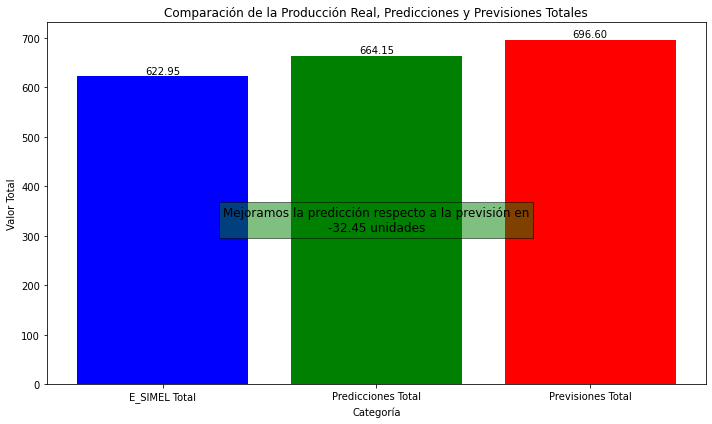

In [88]:
# Valores que cogemos para el gráfico

categorias = ['E_SIMEL Total', 'Predicciones Total', 'Previsiones Total']
valores = [suma_e_simel, sumas_totales_predicciones, sumas_previsiones]

# Creamos un gráfico de barras

plt.figure(figsize=(10, 6))
barra = plt.bar(categorias, valores, color=['blue', 'green', 'red'])

# Añadimos las etiqutas

for rect in barra:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

# Título del gráfico y ponemos las etiquteas a cada barra
    
plt.title('Comparación de la Producción Real, Predicciones y Previsiones Totales')
plt.xlabel('Categoría')
plt.ylabel('Valor Total')


# Ubicamos el texto de la diferencia

pos_y = valores[1] / 2
pos_x = categorias[1]
plt.text(pos_x, pos_y, f'Mejoramos la predicción respecto a la previsión en\n{diferencia:.2f} unidades', ha='center', va='center', fontsize=12, color='black', bbox=dict(facecolor='green', alpha=0.5))
plt.tight_layout()
plt.show()